In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [103]:
# Load the dataset
data = pd.read_csv('datasets.csv')

In [113]:
#Remove trailing spaces from column names
data.columns = data.columns.str.strip()

In [114]:
# Convert 'Date' to datetime format and set as index
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%Y')
data.set_index('Date', inplace=True)

In [115]:
# Remove commas and convert relevant columns to numeric
for col in ['OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap', 'VOLUME', 'VALUE', 'No of trades']:
    data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', ''), errors='coerce')

In [116]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 series          0
OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
ltp             0
close           0
vwap            0
52W H           0
52W L           0
VOLUME          0
VALUE           0
No of trades    0
dtype: int64


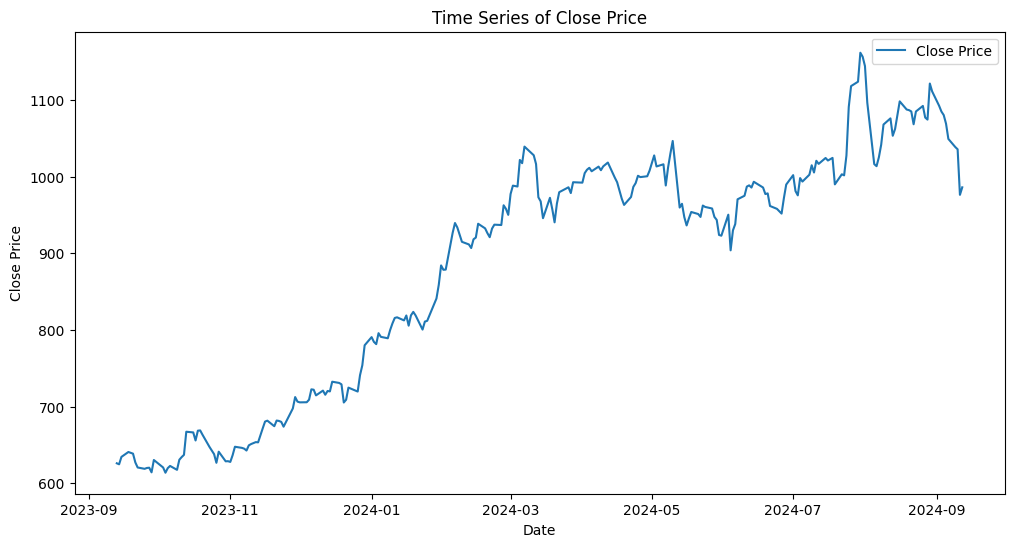

In [117]:
# Step 2: Visualize the data to identify trends, seasonality, and outliers
plt.figure(figsize=(12, 6))
plt.plot(data['close'], label='Close Price')
plt.title('Time Series of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [118]:
# Step 3: Descriptive statistics
print("Summary Statistics:\n", data[['OPEN', 'HIGH', 'LOW', 'close']].describe())


Summary Statistics:
               OPEN         HIGH          LOW        close
count   248.000000   248.000000   248.000000   248.000000
mean    885.813306   894.791331   874.155645   884.209274
std     157.811659   159.959591   154.479379   157.274130
min     618.700000   620.800000   608.300000   613.600000
25%     723.437500   727.250000   713.375000   720.162500
50%     950.000000   958.625000   937.725000   947.400000
75%    1005.000000  1014.587500   990.600000  1002.737500
max    1167.000000  1179.000000  1145.300000  1161.850000


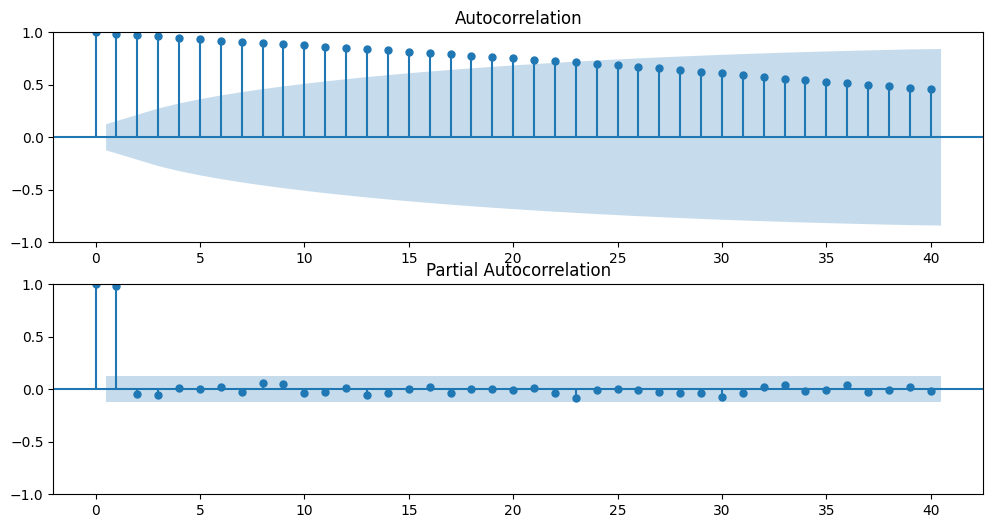

In [119]:
# Step 4: ACF and PACF plots for ARIMA model selection
plt.figure(figsize=(12,6))
plt.subplot(211)
plot_acf(data['close'].dropna(), ax=plt.gca(), lags=40)
plt.subplot(212)
plot_pacf(data['close'].dropna(), ax=plt.gca(), lags=40)
plt.show()

In [120]:
# Based on ACF and PACF plots, select (p,d,q) for ARIMA. Here (1,1,1) is an example.
model = ARIMA(data['close'].dropna(), order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  248
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1049.978
Date:                Wed, 30 Oct 2024   AIC                           2105.957
Time:                        19:39:12   BIC                           2116.485
Sample:                             0   HQIC                          2110.195
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3049      0.650      0.469      0.639      -0.970       1.580
ma.L1         -0.2222      0.663     -0.335      0.737      -1.522       1.077
sigma2       288.2782     13.622     21.162      0.0

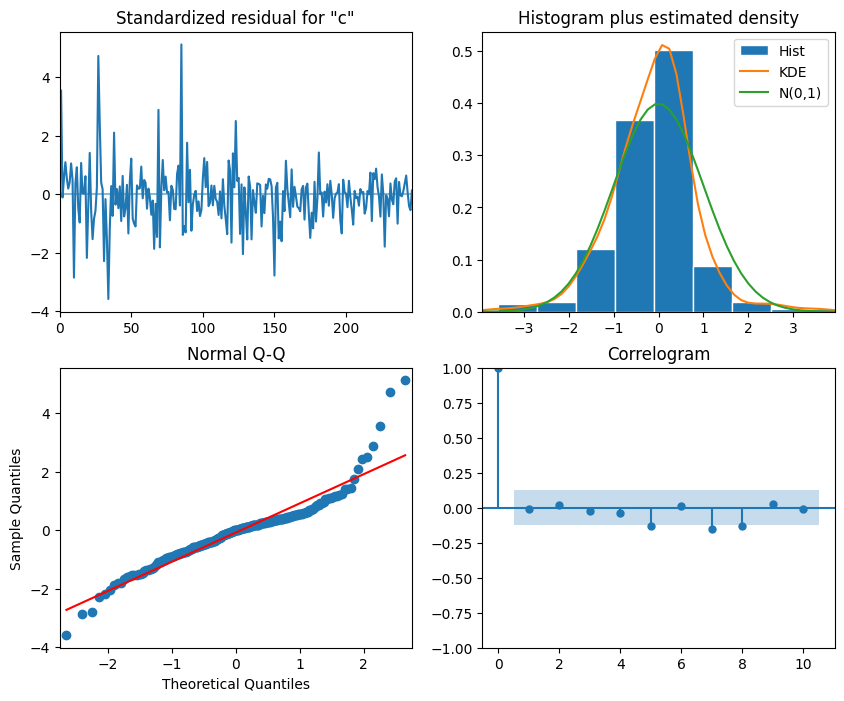

In [121]:
# Step 6: Plot model diagnostics
model_fit.plot_diagnostics(figsize=(10,8))
plt.show()